In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize
from scipy.linalg import lstsq


Итак, нам необходимо аппроксимировать $m$ точек данных с помощью функции
$$ b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.$$
$$
A(\lambda) =
\left(
\begin{array}{cccc}
    1 & t_1 & t_1^2 & e^{\lambda t_1}  \\
    1 & t_2 & t_2^2 & e^{\lambda t_2}  \\
    \vdots & \vdots & \vdots & \vdots  \\
    1 & t_m & t_m^2 & e^{\lambda t_m}  \\
\end{array}
\right)
$$
$$
y = 
\left(
\begin{array}{c}
   y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}
\right),
\qquad
c = 
\left(
\begin{array}{c}
   c_1 \\ c_2 \\ c_3\\ c_4
\end{array}
\right).
$$
В заданном случае, экспериментально нам необходимо рассмотреть $m=9$ точек данных, среди 2х групп. \
Создаем массивы координат точек.

In [19]:
t=np.array([0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
y1=np.array([20,51.58,68.73,75.46,74.36,67.09,54.73,37.98,17.28])
y2=np.array([20,24.13,26.5,27.13,26,23.13,18.5,12.13,4])

С помощью $plt.plot$ визуализируем наши точки

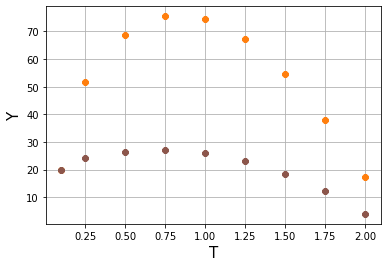

In [29]:
plt.plot(t, y1, '8', color='tab:orange')
plt.plot(t, y2, '8', color='tab:brown')
plt.xlabel('T', size=15)
plt.ylabel('Y', size=15)
plt.grid()
pass

Интерепретируем нашу функцию, для использования в дальнейшем


In [30]:
def func(_lambda, c, t):
    return c[0] + c[1] * t + c[2] * (t ** 2) + c[3] * (np.e ** (_lambda * t))

Создаем функцию-решатель для МНК.

Буду использовать библиотеку NumPy

Построение матрицы выполню с помощью $np.empty()$ - функция, создающая пустой массив указанного размера

https://pyprog.pro/linear_algebra_functions/linalg_lstsq.html

In [95]:
from scipy.linalg import lstsq
def LSQM(_lambda,group_y):
    A = np.empty((9,4), dtype = float)
    A = np.array([[1,t[0],t[0]**2,np.e**(_lambda*t[0])],
                  [1,t[1],t[1]**2,np.e**(_lambda*t[1])],
                   [1,t[2],t[2]**2,np.e**(_lambda*t[2])],
                   [1,t[3],t[3]**2,np.e**(_lambda*t[3])],
                   [1,t[4],t[4]**2,np.e**(_lambda*t[4])],
                   [1,t[5],t[5]**2,np.e**(_lambda*t[5])],
                   [1,t[6],t[6]**2,np.e**(_lambda*t[6])],
                   [1,t[7],t[7]**2,np.e**(_lambda*t[7])],
                   [1,t[8],t[8]**2,np.e**(_lambda*t[8])]])
    
    return np.linalg.lstsq(A, group_y,rcond=0)[0]

Создаем  функцию - решатель


In [144]:
def solver_y1(_lambda):   #Решатель для первой группы данных 
    c = LSQM(_lambda, y1)

    approxy = func(_lambda, c, t)

    return np.sum((approxy - y1) ** 2)

def solver_y2(_lambda):   #Для второй
    c = LSQM(_lambda, y2)

    approxy = func(_lambda, c, t)

    return np.sum((approxy - y2) ** 2)

Чтобы найти границы, требуемые для методов минимизации построим график функции для каждой группы данных и найдем его минимум

Для первой:


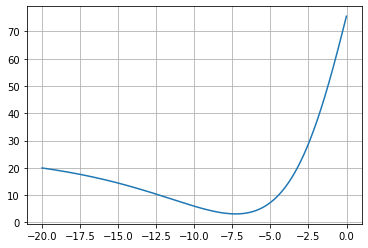

In [157]:
x_graph = np.arange(-20, 0, .01, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solver_y1(x))
    
plt.grid()
plt.plot(x_graph, y_graph)


Минимум для первой группы данных присутсвует в промежутке от -20 до 0

Для второй:

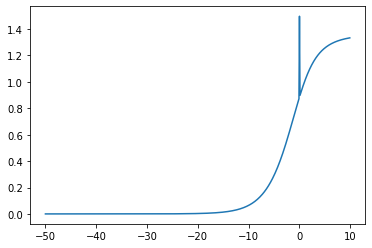

In [153]:
x_graph = np.arange(-50, 10, .1, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solver_y2(x))
    
plt.plot(x_graph, y_graph)

Однозначный минимум для функции на второй группе данных мне найти не удалось, поэтому попытаюсь подобрать наиболее подходящий

Построим наши графики аппроксимации

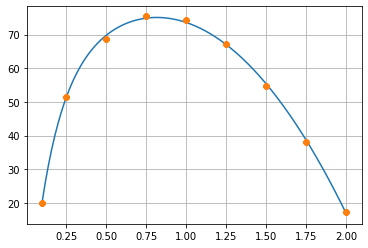

In [158]:
import scipy.optimize
_lambda = optimize.brent(solver_y1,brack=(-10,10))

t_val1 = np.arange(0.1, 2.01, 0.01)
C = LSQM(_lambda, y1)
y_val1 = func(_lambda, C, t_val1)

plt.grid()
plt.plot(t_val1, y_val1)
plt.plot(t, y1, '8')

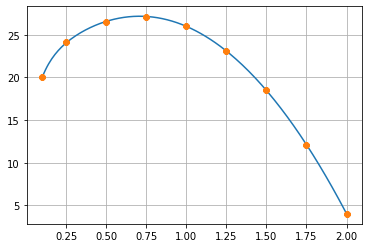

In [159]:
_lambda = -15

t_val2 = np.arange(0.1, 2.01, 0.01, dtype = float)
C = LSQM(_lambda, y2)
y_val2 = func(_lambda, C, t_val2)

plt.grid()
plt.plot(t_val2, y_val2)
plt.plot(t, y2, '8')

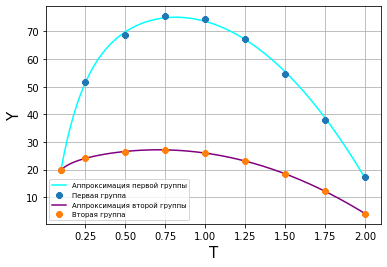

In [132]:
plt.xlabel('T', size=15)
plt.ylabel('Y', size=15)
plt.plot(t_val1, y_val1,color = 'cyan', label='Аппроксимация первой группы')
plt.plot(t, y1, '8',label='Первая группа')
plt.grid()
plt.plot(t_val2, y_val2,color = 'purple',label='Аппроксимация второй группы')
plt.plot(t, y2, '8',label='Вторая группа')
plt.legend(loc = 'lower left', fontsize = 'x-small')

Вывод, нахождение неизвестных параметров напрямую зависит от минимума функции аппроксимации. Если минимум может быть найден, то задача по поиску сводится к его нахождению.
Если минимум неизвестен, задача сводится к подбору наиболее подходящего